## Introduction to Inverse Transform Sampling

Inverse Transform Sampling is a method used to generate random samples from a given probability distribution.
The basic idea is to use the cumulative distribution function (CDF) of the target distribution to transform uniformly distributed random numbers into samples of the target distribution.

In [1]:
import numpy as np
from scipy.stats import uniform

import matplotlib.pyplot as plt

## Uniform Distribution

The uniform distribution is a type of probability distribution in which all outcomes are equally likely. Each variable within the distribution has an equal chance of occurring. 
The uniform distribution is defined over a closed interval $[a,b]$, with $a,b\in\R$ $a<b$, which are the minimum and maximum values, respectively. In our 

### Properties

- **Probability Density Function (PDF)**: For a continuous uniform distribution, the PDF is given by:
    $$
    f(x) = \frac{1}{b - a} \quad \text{for} \quad a \leq x \leq b
    $$
- **Cumulative Distribution Function (CDF)**: The CDF is given by:
    $$
    F(x) = \begin{cases} 
    0 & \text{for } x < a \\
    \frac{x - a}{b - a} & \text{for } a \leq x \leq b \\
    1 & \text{for } x > b 
    \end{cases}
    $$

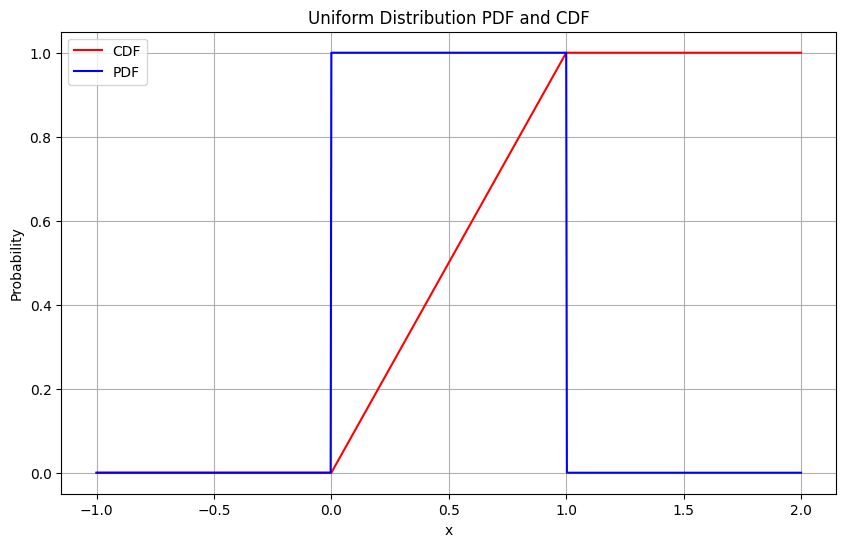

In [2]:
# Parameters for the uniform distribution
a, b = 0, 1

# Adjust x values to range from -1 to 2
x = np.linspace(-1, 2, 1000)

# Calculate PDF and CDF for the new range
pdf = uniform.pdf(x, a, b-a)
cdf = uniform.cdf(x, a, b-a)

# Plot PDF and CDF
plt.figure(figsize=(10, 6))
plt.plot(x, cdf, label='CDF', color='red')
plt.plot(x, pdf, label='PDF', color='blue')#, linestyle='dotted')

plt.title('Uniform Distribution PDF and CDF')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

## Method of Inverse Transform Sampling


Let $X$ be a real random variable with CDF $F_X$ and $U\sim U([0,1])$ uniformly distributed on the interval $[0,1]$.

We define the a generalized inverse function of the CDF $F_X$ for all $z\in[0,1]$ as
$$F_X^{-1}(z)\coloneqq \inf\{x\colon z\le F_X(x)\}.$$
Further we define a random variable 
$$X^\prime\coloneqq F_X^{-1}(U).$$

Our claim is now that $X$ and $X^\prime$ are identically distributed.
This can be proven by looking at the CDF.
We first note that since $F_X$ is right-continuous we have
$$\{z\colon F_X^{-1}(z)\le x\}=\{z\colon \inf\{y\colon z\le F_X(y)\}\le x\}=\{z\colon z\le F_X(x)\}$$
where the last equality holds since the infimum is $\le x$, iff $z\le F_X(x)$.
Hence we get
$$\mathbb{P}(X^\prime\le x)=\mathbb{P}(F_X^{-1}(U)\le x)=\mathbb{P}(U\le F_X(x))=F_X(x)=\mathbb{P}(X\le x).$$

## Idea behind Inverse Transform Sampling

Suppose we can create samples of the uniform distribution very efficiently.
Instead of having to implement a completely new sampling method for a different distribution which might have a worse runtime, we simply
* calculate the generalized inverse function of the new CDF (one time costs only)
* sample from the uniform distribution (efficient runtime)
* apply the generalized inverse function (hopefully efficient as well :D )
### Example

For example, to generate samples from an exponential distribution with rate parameter $ \lambda $, we can use the following steps:

1. We can compute the inverse CDF of the exponential distribution: $ x = -\frac{1}{\lambda} \ln(1 - z) $.
2. Hence our  a uniform random number $ u $ from $ U(0, 1) $.

This process can be generalized to other distributions as well.

## Exercise

1) Implement a function that determines the generalized inverse function for discrete CDFs.
2) Implement a function that applies the inverse transform sampling.

**Note:** For runtime and compatibility sake you can use a native function that determines the generalized inverse function for 2).

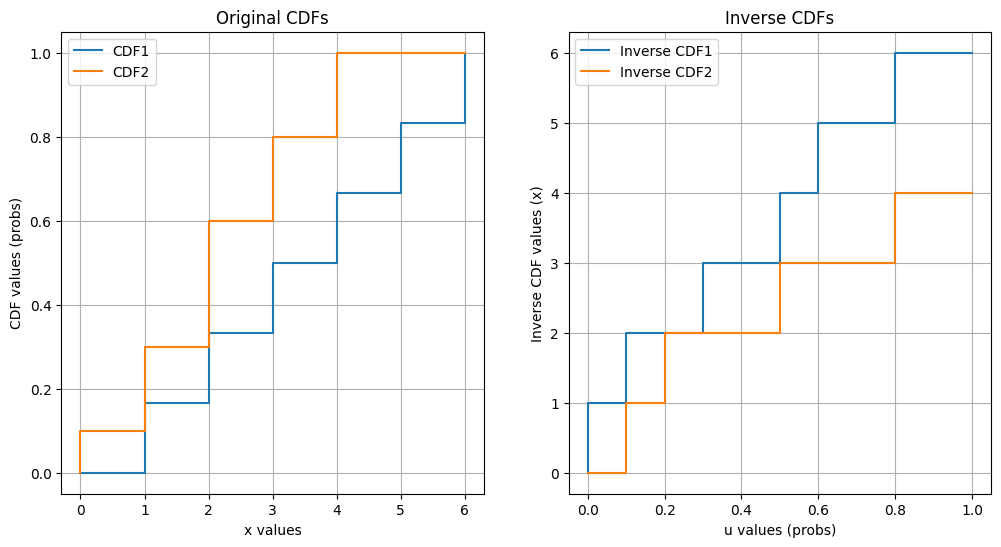

In [ ]:
# 1)
def generalized_inverse(cdf):
    """
    Calculate the generalized inverse of a discrete monotonic function.
    
    Parameters:
    cdf (list): A list of values representing the cumulative distribution function (CDF).
    
    Returns:
    function: A function that maps a value from [0, 1] to the corresponding value in the domain of the original function.
    """
    ### YOUR CODE HERE ###
    ...
    ### END YOUR CODE ###
    return inverse_function

# Example usage:
# Example 1: a dice
cdf1 = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1.0]
inverse_cdf1 = generalized_inverse(cdf1)

# Example 2: Your own CDF
### YOUR CODE HERE ###
...
### END YOUR CODE ###
inverse_cdf2 = generalized_inverse(cdf2)

# Test the inverse function
u_values = np.linspace(0, 1, 11)
# Plot the inverse of cdf1 and cdf2
plt.figure(figsize=(12, 6))
# Plot the original CDFs
plt.subplot(1, 2, 1)
f = lambda cdf: [(0,0), *zip(range(len(cdf)), cdf), (max(len(cdf1), len(cdf2))-1, 1)] 
plt.step(*zip(*f(cdf1)), where='post', label='CDF1')
plt.step(*zip(*f(cdf2)), where='post', label='CDF2')
plt.title('Original CDFs')
plt.xlabel('x values')
plt.ylabel('CDF values (probs)')
plt.legend()
plt.grid(True)
# Plot the inverse CDFs
plt.subplot(1, 2, 2)
# Plot for cdf1
inverse_values1 = [inverse_cdf1(u) for u in u_values]
plt.step(u_values, inverse_values1, label='Inverse CDF1')

# Plot for cdf2
inverse_values2 = [inverse_cdf2(u) for u in u_values]
plt.step(u_values, inverse_values2, label='Inverse CDF2')

plt.title('Inverse CDFs')
plt.xlabel('u values (probs)')
plt.ylabel('Inverse CDF values (x)')
plt.legend()
plt.grid(True)
plt.show()

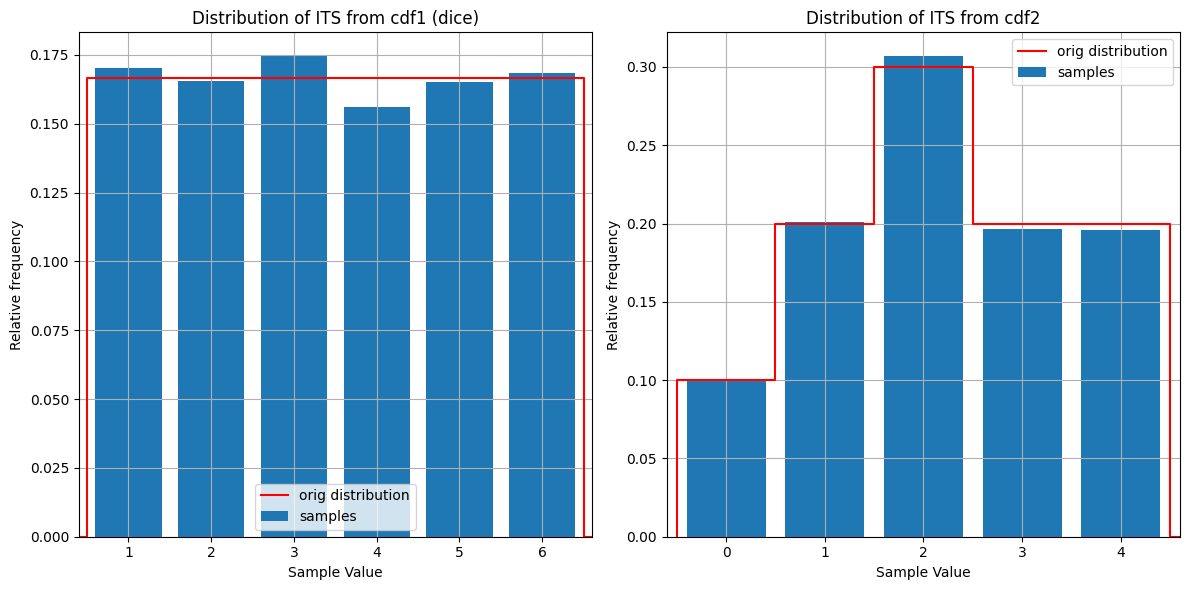

In [ ]:
# 2)
def inverse_transform_sampling(cdf, n_samples=1000):
    """
    Perform inverse transform sampling to generate random samples from a given CDF.
    
    Parameters:
    cdf (list or numpy.ndarray): The cumulative distribution function (CDF) values.
    n_samples (int): The number of random samples to generate.
    
    Returns:
    numpy.ndarray: An array of random samples generated from the given CDF.
    """
    ### YOUR CODE HERE ###
    ...
    ### END YOUR CODE ###
    return samples

# Example usage:
n_samples = 10000
samples1 = inverse_transform_sampling(cdf1, n_samples=n_samples)
samples2 = inverse_transform_sampling(cdf2, n_samples=n_samples)

unique_max1, counts_max1 = np.unique(samples1, return_counts=True)
relative_frequencies1 = counts_max1 / n_samples
unique_max2, counts_max2 = np.unique(samples2, return_counts=True)
relative_frequencies2 = counts_max2 / n_samples

plt.figure(figsize=(12, 6))

f = lambda cdf: [0, cdf[0]] + [cdf[i] - cdf[i-1] for i in range(1, len(cdf))] + [0]
# Plot histogram for samples1
plt.subplot(1, 2, 1)
plt.bar(unique_max1, relative_frequencies1)
plt.step(np.array(range(len(f(cdf1))))-.5, f(cdf1), color='red')
plt.xlim(0.4, 6.6)
plt.title('Distribution of ITS from cdf1 (dice)')
plt.xlabel('Sample Value')
plt.ylabel('Relative frequency')
plt.legend(['orig distribution', 'samples'])
plt.grid(True)

# Plot histogram for samples2
plt.subplot(1, 2, 2)
plt.bar(unique_max2, relative_frequencies2)
plt.step(np.array(range(len(f(cdf2))))-.5, f(cdf2), color='red')
plt.title('Distribution of ITS from cdf2')
plt.xlim(-.6, len(cdf2) - .4)
plt.xlabel('Sample Value')
plt.ylabel('Relative frequency')
plt.grid(True)
plt.legend(['orig distribution', 'samples'])
plt.tight_layout()
plt.show()